In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('./data/IMDb_movies.csv')

/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [136]:
def clean_imdb(df):
    imdb = df.rename(columns = {'worlwide_gross_income':'worldwide_gross_income'})
    imdb = imdb.drop(imdb.index[83917])
    imdb['year'] = imdb['year'].astype(int)
    imdb = imdb[imdb['year']>2014]
    imdb = imdb.dropna()
    imdb['budget'] = imdb['budget'].map(lambda x: x.lstrip('$EURCZKNYGBPWILSADMXNJPYOP')).astype(int)
    imdb['worldwide_gross_income'] = imdb['worldwide_gross_income'].map(lambda x: x.lstrip('$EURCZKNYGBPWILSADMXNJPYOP')).astype(int)
    imdb['usa_gross_income'] = imdb['usa_gross_income'].map(lambda x: x.lstrip('$EURCZKNYGBPWILSADMXNJPYOP')).astype(int)
    imdb['date_published'] = pd.to_datetime(imdb['date_published'])
    return imdb

imdb = clean_imdb(df)

Wewill work with the ten most successful movies in terms of usa gross income from 2015 to 2020

In [6]:
movies = imdb.sort_values(['usa_gross_income'], ascending=False).groupby('year').head(10)
movies.shape

(60, 22)

In [7]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worldwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [8]:
movies.describe()

,year,duration,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,60.000000,60.000000,60.000000,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000
mean,2017.500000,121.950000,7.023333,357702.116667,1.537917e+08,3.494225e+08,9.245040e+08,63.000000,2021.400000,461.983333
std,1.722237,19.915436,0.828797,241041.596783,8.179124e+07,1.942177e+08,5.219527e+08,14.397504,2165.603616,187.490700
min,2015.000000,85.000000,4.200000,2646.000000,7.000000e+06,1.729108e+07,2.069078e+07,22.000000,80.000000,63.000000
25%,2016.000000,106.000000,6.500000,165434.750000,8.487500e+07,2.263650e+08,6.522968e+08,54.500000,736.500000,332.750000
50%,2017.500000,123.000000,7.050000,306714.500000,1.600000e+08,3.357485e+08,8.804208e+08,64.500000,1307.500000,457.500000
75%,2019.000000,136.250000,7.625000,548393.250000,2.000000e+08,4.286319e+08,1.149697e+09,73.250000,2205.500000,615.250000
max,2020.000000,181.000000,8.500000,882037.000000,3.560000e+08,9.366622e+08,2.797801e+09,94.000000,10472.000000,909.000000


let's check the genres of the selected movies

<BarContainer object of 16 artists>

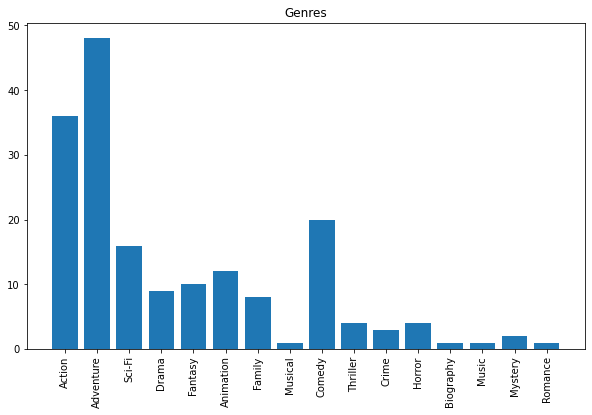

In [9]:
from collections import Counter
genres = [genres.split() for genres in movies['genre'].tolist()]
labels, values = zip(*Counter([genre.replace(',', '') for genre_list in genres for genre in genre_list]).items())
plt.figure(figsize = (10,6))
plt.title('Genres')
plt.xticks(rotation=90)
plt.bar(labels, values)

Now let's visualize the IMDb ratings as well, we scatter the critics' ratings (metascore) against the users' raatings (avg_vote)

<AxesSubplot:title={'center':'Ratings'}, xlabel='avg_vote', ylabel='metascore'>

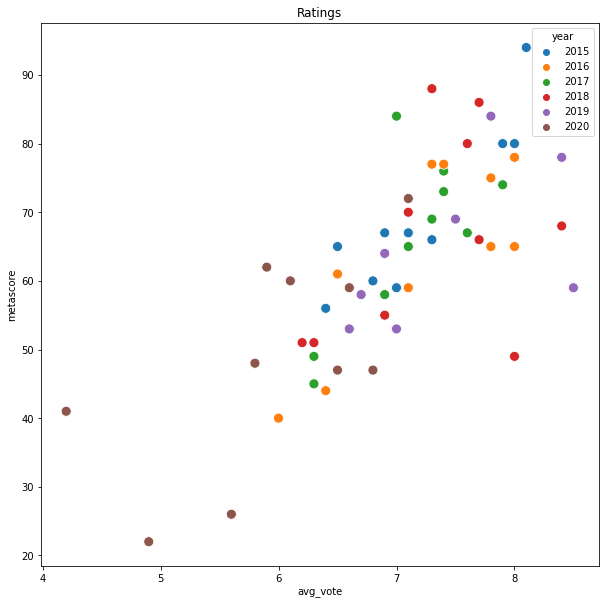

In [10]:
plt.figure(figsize = (10,10))
plt.title('Ratings')
sns.scatterplot(data=movies, x="avg_vote", y="metascore", hue='year', palette='tab10', s=100)

We could also scatter the budget against the box office, it looks like in 2020 producers spent less money on movies and also less people went to the cinama. This has something to do with COVID-19, looks like we have a confounder. So we should keep this in mind in our project later!

<AxesSubplot:title={'center':'Ratings'}, xlabel='budget', ylabel='usa_gross_income'>

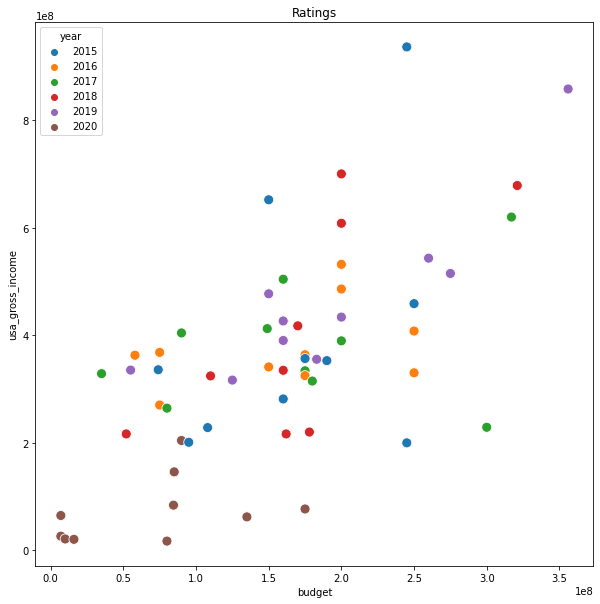

In [11]:
plt.figure(figsize = (10,10))
plt.title('Ratings')
sns.scatterplot(data=movies, x='budget', y='usa_gross_income', hue='year', palette='tab10', s=100)

Now we take a look at the distribution of the votes and total incomes, we denote the median with red dotted line

In [12]:
mean = movies['avg_vote'].median()
std = movies['avg_vote'].std()
print(f'       mean        of movie rating: {"{:.2f}".format(mean)}')
print(f'standard deviation of movie rating: {"{:.2f}".format(std)}')

       mean        of movie rating: 7.05
standard deviation of movie rating: 0.83


<AxesSubplot:title={'center':'IMDb rating'}, xlabel='avg_vote', ylabel='Count'>

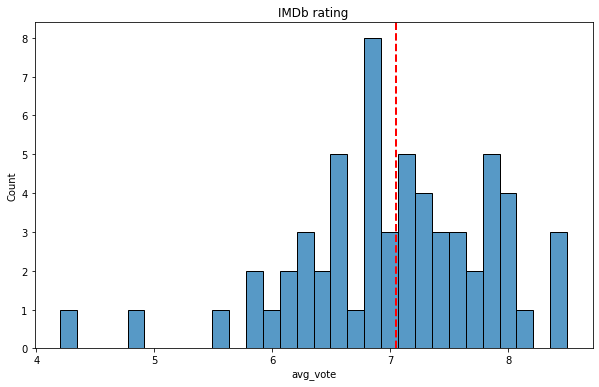

In [13]:
plt.figure(figsize = (10,6))
plt.title('IMDb rating')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
sns.histplot(data = movies['avg_vote'], bins=30)

In [114]:
median = movies['usa_gross_income'].median()
std = movies['usa_gross_income'].std()
print(f'      median       of usa gross income: $ {"{:.2f}".format(median)}')
print(f'standard deviation of usa gross income: $ {"{:.2f}".format(std)}')

      median       of usa gross income: $ 366192726.50
standard deviation of usa gross income: $ 169840095.45


<AxesSubplot:title={'center':'Box office log scale'}, xlabel='worldwide_gross_income', ylabel='Count'>

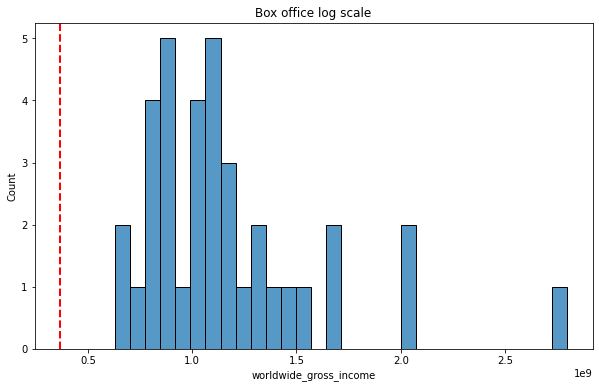

In [113]:
plt.figure(figsize = (10,6))
plt.title('Box office log scale')
plt.axvline(movies['usa_gross_income'].median(), color='r', linestyle='dashed', linewidth=2)
sns.histplot(data = movies['worldwide_gross_income'], bins=30)

Now we filter the Quotebank data based and look for quotes on the above mentioned movies. We search for the title of the movie in the **'quotation'** field of the Quotebank data. 

In [29]:
quotes_2015 = pd.read_json('./data/quotes-2015-movies.json.bz2', lines=True)
quotes_2016 = pd.read_json('./data/quotes-2016-movies.json.bz2', lines=True)
#quotes_2017 = pd.read_json('./data/quotes-2017-movies.json.bz2', lines=True)
quotes_2018 = pd.read_json('./data/quotes-2018-movies.json.bz2', lines=True)
quotes_2019 = pd.read_json('./data/quotes-2019-movies.json.bz2', lines=True)
quotes_2020 = pd.read_json('./data/quotes-2020-movies_1.json.bz2', lines=True) # it does'nt have the movie thing

We can count the number of quotes found in a movie in the year of release, although it does not tell the full story, let us consider the number of occurances as well

In [17]:
quotes_2019.groupby('movie').count()['quotation'].sort_values(ascending=False)

movie
Star Wars: Episode IX - The Rise of Skywalker    4668
Avengers: Endgame                                3780
Spider-Man: Far from Home                        2215
Joker                                            1809
Captain Marvel                                   1362
Aladdin                                           766
The Lion King                                     486
Jumanji: The Next Level                           309
Toy Story 4                                       164
Frozen II                                          40
Name: quotation, dtype: int64

One thing we can spot is that frozen only has 71 quotes which seems unreasonably few. We can explain this by looking the release dates of the movies. Frozen was released at the end of November, so the movie did not really have the time to accumulate the quotes. On the other hand, movies like Star Wars or Joker did receive a lot of quotations. A possibility would be to look for quotes on these movies in other years as well.

In [18]:
quotes_2019.groupby('movie').sum()['numOccurrences'].sort_values(ascending=False)


movie
Star Wars: Episode IX - The Rise of Skywalker    30131
Avengers: Endgame                                 9949
Spider-Man: Far from Home                         6234
Joker                                             5219
Captain Marvel                                    2713
The Lion King                                     2634
Aladdin                                           1995
Jumanji: The Next Level                            827
Toy Story 4                                        540
Frozen II                                           71
Name: numOccurrences, dtype: int64

In [19]:
movies[movies['year'] == 2019][['original_title', 'date_published']].sort_values(by='date_published')

,original_title,date_published
73863,Captain Marvel,2019-03-06
73865,Avengers: Endgame,2019-04-24
79742,Aladdin,2019-05-22
63599,Toy Story 4,2019-06-26
80305,Spider-Man: Far from Home,2019-07-10
79633,The Lion King,2019-08-21
82239,Joker,2019-10-03
74934,Frozen II,2019-11-27
67677,Star Wars: Episode IX - The Rise of Skywalker,2019-12-18
83528,Jumanji: The Next Level,2019-12-25


Let's sum all the occurrences of the movies and merge teh results with our **movies** dataframe.

<span style="color:red"> WARNING: for some reason my filtering is not the same as yours Julian</span>

In [20]:
occ15 = quotes_2015.groupby('movie').sum()['numOccurrences']
occ16 = quotes_2016.groupby('movie').sum()['numOccurrences']
#occ17 = quotes_2017.groupby('movie').sum()['numOccurrences']
occ18  =quotes_2018.groupby('movie').sum()['numOccurrences']
occ19 = quotes_2019.groupby('movie').sum()['numOccurrences']
#occ20 = quotes_2020.groupby('movie').sum()['numOccurrences']

all_occurrences = pd.concat([occ15, occ16, occ18, occ19])
movies = movies.merge(all_occurrences,left_on='original_title', right_index=True)

In [46]:
all_quotes = pd.concat([quotes_2015, quotes_2016, quotes_2018, quotes_2019])
all_quotes.shape

(51993, 10)

Now we are ready to scatter the number of occurences on a certain movie against the box office


<AxesSubplot:title={'center':'Quotes vs box office'}, xlabel='numOccurrences', ylabel='usa_gross_income'>

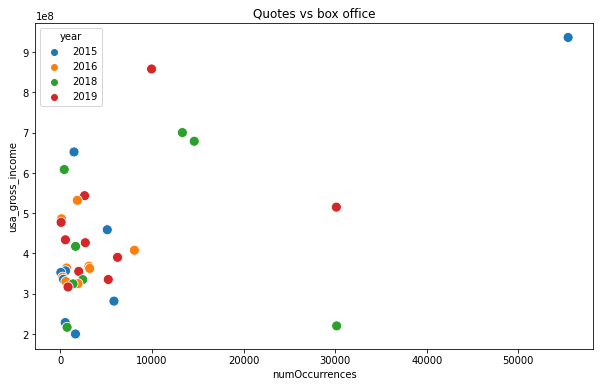

In [21]:
plt.figure(figsize = (10,6))
plt.title('Quotes vs box office')
sns.scatterplot(data=movies, x='numOccurrences', y='usa_gross_income', hue='year', palette='tab10', s=100)

Check what are the outliers, we have one in 2015, 2018 and 2019

In [22]:
outliers = pd.concat([
movies[movies['year']==2015].sort_values('numOccurrences').nlargest(1, columns=['numOccurrences']),
movies[movies['year']==2018].sort_values('numOccurrences').nlargest(1, columns=['numOccurrences']),
movies[movies['year']==2019].sort_values('numOccurrences').nlargest(1, columns=['numOccurrences'])])
outliers['original_title']

67523       Star Wars: Episode VII - The Force Awakens
76126                    Mission: Impossible - Fallout
67677    Star Wars: Episode IX - The Rise of Skywalker
Name: original_title, dtype: object

<AxesSubplot:title={'center':'Quotes vs box office'}, xlabel='numOccurrences', ylabel='usa_gross_income'>

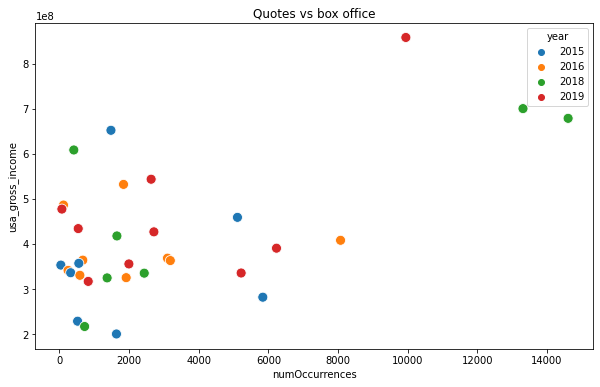

In [23]:
plt.figure(figsize = (10,6))
plt.title('Quotes vs box office')
sns.scatterplot(data=movies.drop(index=outliers.index), x='numOccurrences', y='usa_gross_income', hue='year', palette='tab10', s=100)

Maybe log-log scale?

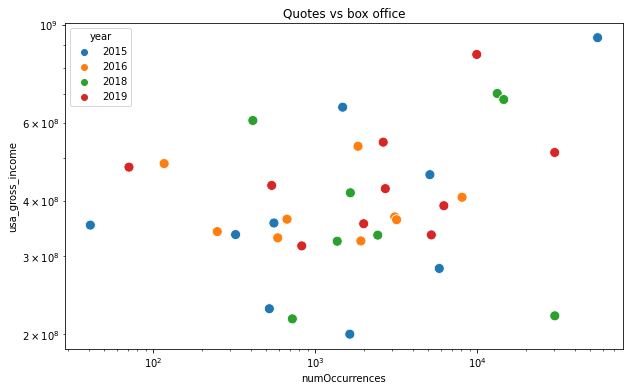

In [24]:
plt.figure(figsize = (10,6))
plt.title('Quotes vs box office')
g = sns.scatterplot(data=movies, x='numOccurrences', y='usa_gross_income', hue='year', palette='tab10', s=100)
g.set_xscale('log')
g.set_yscale('log')

In [48]:
all_quotes[all_quotes['speaker'] != 'None'].groupby(['speaker', 'movie']).sum()['numOccurrences'].sort_values(ascending=False).head(20)

speaker                 movie                                        
President Donald Trump  Mission: Impossible - Fallout                    3324
Kevin Feige             Avengers: Infinity War                           1373
Ryan Reynolds           Deadpool                                         1300
Joe Russo               Avengers: Infinity War                           1289
J.J. Abrams             Star Wars: Episode VII - The Force Awakens       1160
Kathleen Kennedy        Star Wars: Episode VII - The Force Awakens       1067
Kevin Feige             Avengers: Endgame                                 922
Michael B. Jordan       Black Panther                                     775
George Lucas            Star Wars: Episode VII - The Force Awakens        691
Tom Holland             Spider-Man: Far from Home                         667
Kathleen Kennedy        Star Wars: Episode IX - The Rise of Skywalker     642
Kevin Feige             Spider-Man: Far from Home                       

Let's focus on a spesific movie, Star Wars: Episode VII - The Force Awakens

In [55]:
all_quotes[(all_quotes['movie']=='Star Wars: Episode VII - The Force Awakens') & (all_quotes['speaker'] != 'None')].groupby('speaker').sum()['numOccurrences'].sort_values(ascending=False).head(20)

speaker
J.J. Abrams               1160
Kathleen Kennedy          1067
George Lucas               691
Bob Iger                   611
John Boyega                591
President Barack Obama     320
Steve Sansweet             304
Lawrence Kasdan            241
Mark Zuckerberg            237
JJ Abrams                  237
Ava DuVernay               189
Steven Spielberg           184
Tan Le                     182
Carrie Fisher              170
Chris Pratt                142
Mark Hamill                138
Patton Oswalt              138
Kate Muir                  136
Gary Grant                 131
Bart Simpson               129
Name: numOccurrences, dtype: int64

We plot the distribution of quotes in time and mark the premier of a the movie with a red line. Also we can observe a spike in the middle of April. It corresponds to the release date of the second teaser trailer on April 16.

<span style="color:red"> This plot does not really work if on the y axis I plot the number of occurences, because the movie title alone is an outlier </span>

<AxesSubplot:title={'center':'Distributions of quotes in time'}, xlabel='date', ylabel='Count'>

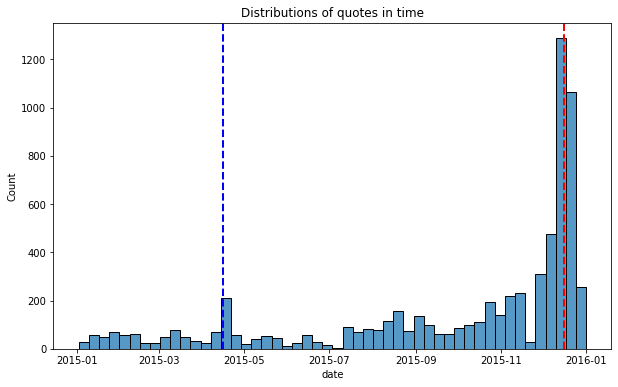

In [150]:
import datetime as dt
plt.figure(figsize = (10,6))
plt.title('Distributions of quotes in time')
title = 'Star Wars: Episode VII - The Force Awakens'
star_wars = all_quotes[all_quotes['movie']==title]
plt.axvline(dt.date(2015, 4, 16), color='b', linestyle='dashed', linewidth=2)
plt.axvline(movies[movies['original_title'] == title]['date_published'], color='r', linestyle='dashed', linewidth=2)
sns.histplot(data=star_wars['date'], bins=50)

Again there are clearly spikes when a trailer is released for the movie: 2019 April 12, 2019 Oct 22, 2019 Aug 26

<AxesSubplot:title={'center':'Distributions of quotes in time of Star Wars: Episode IX'}, xlabel='date', ylabel='Count'>

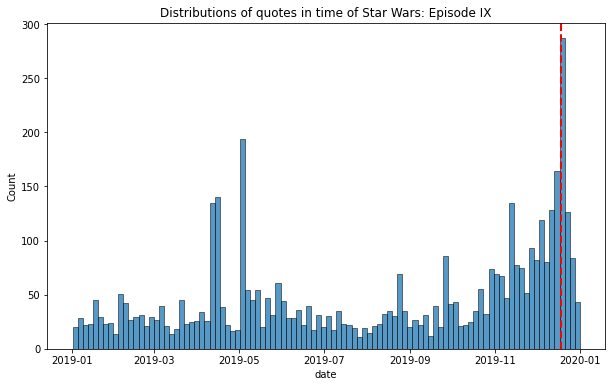

In [156]:
plt.figure(figsize = (10,6))
plt.title('Distributions of quotes in time of Star Wars: Episode IX')
title = 'Star Wars: Episode IX - The Rise of Skywalker'
star_wars = all_quotes[all_quotes['movie']==title]
#plt.axvline(dt.date(2015, 4, 16), color='b', linestyle='dashed', linewidth=2)
plt.axvline(movies[movies['original_title'] == title]['date_published'], color='r', linestyle='dashed', linewidth=2)
sns.histplot(data=star_wars['date'], bins=100)

<AxesSubplot:title={'center':'Avengers Infinity War'}, xlabel='date', ylabel='Count'>

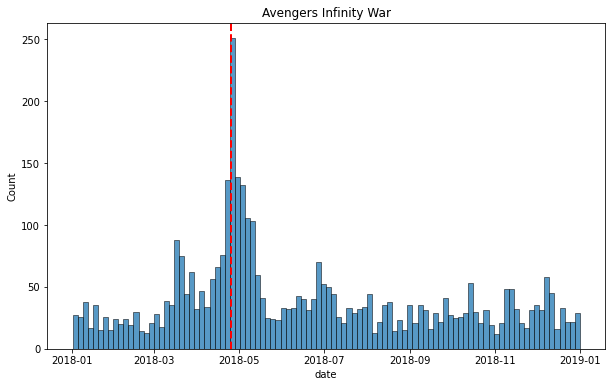

In [167]:
plt.figure(figsize = (10,6))
plt.title('Avengers Infinity War')
avengers['date'] = avengers['date'].dt.date
title = 'Avengers: Infinity War'
avengers = all_quotes[all_quotes['movie']==title]
#plt.axvline(dt.date(2015, 4, 16), color='b', linestyle='dashed', linewidth=2)
plt.axvline(movies[movies['original_title'] == title]['date_published'], color='r', linestyle='dashed', linewidth=2)
sns.histplot(data=avengers['date'], bins=100)

In [258]:
#TODO check correlation between box office and quotes
box_office = pd.read_csv('./data/time_series_box_office_data/Avengers_Infinity_War___Box_Office_Mojo.csv')
np.array(avengers.groupby('date').count()['quotation'])

array([  6,   6,   9,   6,   1,   5,  16,   7,   8,   4,  19,   9,   4,
         1,   8,  13,   9,  11,   4,   2,   7,   3,   2,  10,   4,  12,
         1,   5,   2,  11,   4,   4,  10,   7,   4,   4,   8,   8,   8,
         4,   7,   3,   1,   9,   2,  15,  10,   4,   1,   2,  10,   1,
         5,   3,   4,   3,   6,   9,   3,  11,  10,   6,   1,   5,   5,
         9,  13,  20,   4,   3,   7,  16,   3,  26,  33,  27,  10,  27,
        16,  19,  21,  18,   4,   6,  42,   8,  15,   5,   7,   9,  13,
         9,  18,   9,  11,  15,   8,   7,  10,  29,  11,   8,  15,  13,
        13,  25,  23,  16,  24,  20,  16,  17,  77, 100,  68,  50,  58,
        25,  17,  68,  43,  46,  32,  34,  15,  13,  45,  40,  39,  32,
        27,   9,  18,  12,  16,  26,  14,   5,   6,   3,   5,  11,   6,
         3,  10,   5,   8,   4,   6,  12,  10,  11,   5,  11,   8,   8,
         8,   9,  13,   5,   8,  11,   7,  20,  21,  16,   4,   2,  16,
         9,   6,   7,  11,  17,  30,  18,  19,   8,  30,   8,  1